# In the Iris of the Beholder

<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

![Iris Dataset](https://i.pinimg.com/564x/65/10/03/651003b574fe55ba847646b883064ff3.jpg)

<hr style="border-top: 10px groove blueviolet; margin-top: 1px; margin-bottom: 1px"></hr>

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# Viz imports
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling imports
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

# Custom module imports
from acquire import get_iris_data, summarize_df
import prepare
import explore

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## Project Planning

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

- [x] Create README.md with data dictionary, project and business goals, come up with initial hypotheses.
- [x] Acquire data from the Codeup Database and create a function to automate this process. Save the function in an acquire.py file to import into the Final Report Notebook.
- [x] Clean and prepare data for the first iteration through the pipeline, MVP preparation. Create a function to automate the process, store the function in a prepare.py module, and prepare data in Final Report Notebook by importing and using the funtion.
- [x]  Clearly define two hypotheses, set an alpha, run the statistical tests needed, reject or fail to reject the Null Hypothesis, and document findings and takeaways.
- [x] Establish a baseline accuracy and document well.
- [x] Train three different classification models.
- [x] Evaluate models on train and validate datasets.
- [x] Choose the model with that performs the best and evaluate that single model on the test dataset.
- [x] Document conclusions, takeaways, and next steps in the Final Report Notebook.

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## Acquire Data

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

In [2]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

|Target|Datatype|Definition|
|:-------|:--------|:----------|
| species | 150 non-null: object | iris species - virginica, versicolor, setosa |

|Feature|Datatype|Definition|
|:-------|:--------|:----------|
| petal_length       | 150 non-null: float64 |    iris petal length in cm |
| petal_width        | 150 non-null: float64 |    iris petal width in cm |
| sepal_length       | 150 non-null: float64 |    iris sepal length in cm |
| sepal_width        | 150 non-null: float64 |    iris sepal width in cm |

In [3]:
# read iris data into a DataFrame
df = get_iris_data()

In [4]:
summarize_df(df)

This dataframe has 150 rows and 6 columns.
------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   species_id    150 non-null    int64  
 1   species_name  150 non-null    object 
 2   sepal_length  150 non-null    float64
 3   sepal_width   150 non-null    float64
 4   petal_length  150 non-null    float64
 5   petal_width   150 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB
None
------------------------

   species_id species_name  sepal_length  sepal_width  petal_length  \
0           1       setosa           5.1          3.5           1.4   
1           1       setosa           4.9          3.0           1.4   
2           1       setosa           4.7          3.2           1.3   
3           1       setosa           4.6          3.1           1.5   
4           1       setosa         

### Acquire Takeaways

- I wrote a sql query to acquire my data from the Codeup database.
- I'm importing my get_iris_data function from my acquire.py file that will create a local csv file of my data for future use.
- I'm bringing in 150 rows and 6 columns on my initial acquisition.
- All of my numeric columns are in the same unit of measure, cm, and there is not a substantial difference in the value ranges.

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## Prepare Data

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

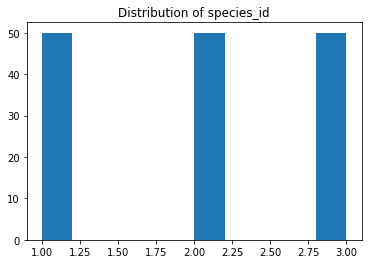

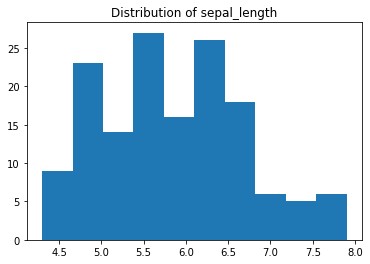

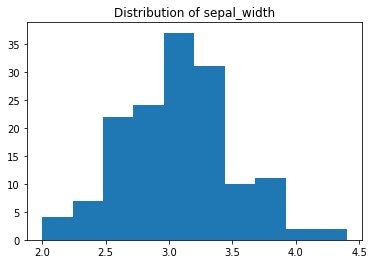

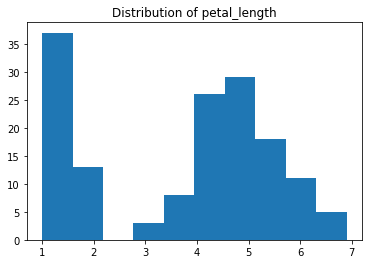

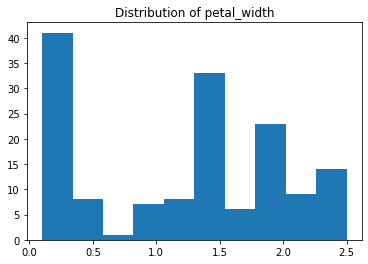

In [5]:
prepare.num_distributions(df)

In [6]:
train, validate, test = prepare.prep_iris(df)

In [7]:
print(f'train -> {train.shape}')
print(f'validate -> {validate.shape}')
print(f'test -> {test.shape}')

train -> (84, 5)
validate -> (36, 5)
test -> (30, 5)


### Prepare Takeaways

- I checked for Null values; this is a squeaky clean dataset, so I don't have to deal with missing values.
- The target classes are perfectly balanced with 50 of each species, so I don't have to worry about unbalanced data.
- On initial viewing of distributions of features, I can see that while sepal length and width are relatively normally distributed, petal length and width have a bimodal distribution which may be of value in identifying species, the target. I'll look at how species plays into these bimodal distributions in explore, after I split my data.
- `species_id` is not a useful column to me going forward, so I will drop it before I split.
- As my numeric columns are in the same unit of measure and range of values reasonible, I won't need to scale my numeric columns before modeling.
- I'll split my data into train, validate, and test datasets, stratifying my species column.

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## Explore Data

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

In [8]:
plt.rc('font', size=14)
plt.rc('figure', figsize=(14, 10))

In [9]:
# Create melted df for viz
melted = train.melt(id_vars=['species'])

In [10]:
# Check out melted df info.
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   species   336 non-null    object 
 1   variable  336 non-null    object 
 2   value     336 non-null    float64
dtypes: float64(1), object(2)
memory usage: 8.0+ KB


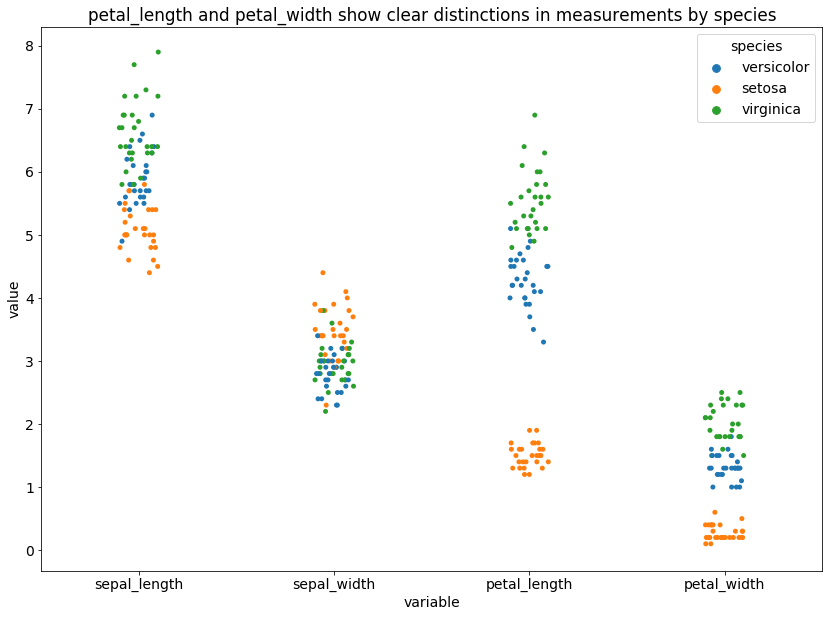

In [11]:
# Create a stripplot to examine the distribution of species throughout each continuous variable.
sns.stripplot(data=melted, x='variable', y='value', hue='species')

plt.title('petal_length and petal_width show clear distinctions in measurements by species')

plt.show()

##### Stripplot Takeaways

- Looking at the distribution of the species throughout each continuous variable, the clear distinctions between petal length and width by species lead me to believe these might be valuable features in predicting species.

___

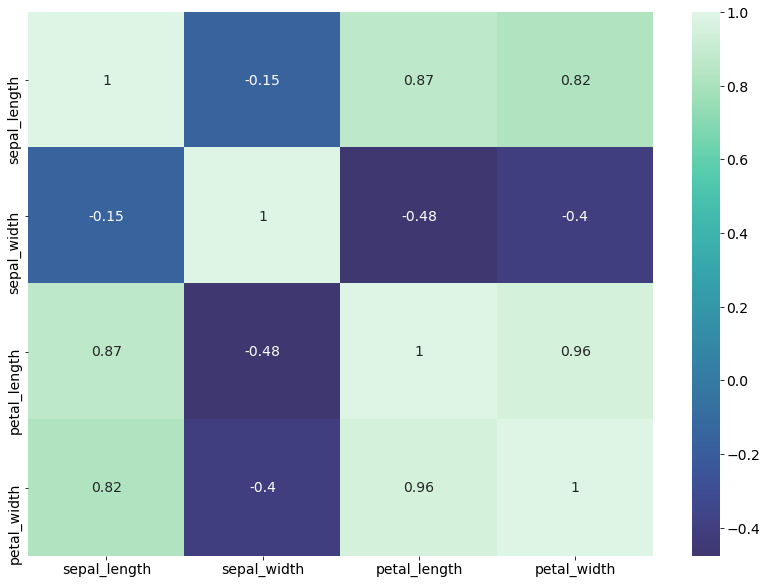

In [12]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)

plt.title('')
plt.show()

##### Heatmap Takeaways

- most measures correlate with each other, the least is sepal_width with sepal_length @ -.15.
- Negative correlations: Wider sepals -> shorter & narrower petals (smaller petal areas)
- Positive correlations: Longer sepals -> longer & wider petals (larger petal areas)
- Little to no LINEAR correlation: sepal length & sepal width.

___

In [13]:
# Feature engineering with continuous variables; can I create useful features?

train['sepal_area'] = train.sepal_length * train.sepal_width
train['petal_area'] = train['petal_length'] * train['petal_width']

In [14]:
train.head(2)

,species,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area
79,versicolor,5.7,2.6,3.5,1.0,14.82,3.50
36,setosa,5.5,3.5,1.3,0.2,19.25,0.26


In [15]:
combos = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_area', 'petal_area'),
    ('sepal_length', 'petal_length')
]

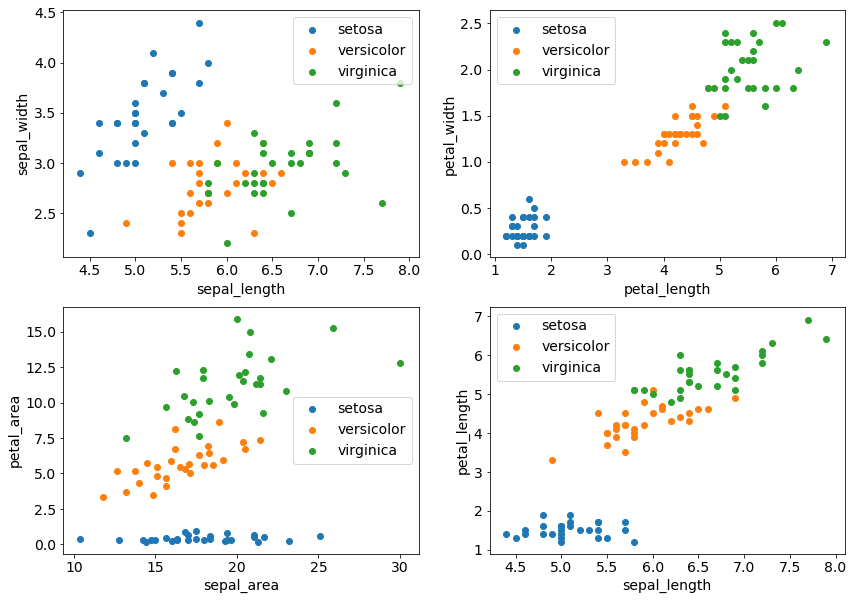

In [16]:
for i, pair in enumerate(combos):
    plt.subplot(2,2,i+1)
    explore.scatter_species(train, pair[0], pair[1])

##### Feature Engineering Takeaways

- sepal_length is useful, sepal_width not great but likely adds some value.
- petal_area is very useful, as we would expect given the previous plot of petal_width x petal length.
- sepal_area is questionable, as we don't see much separation when we look at the 3rd - plot in a hortizonal direction. Again, some value in sepal width, but not a ton.


___

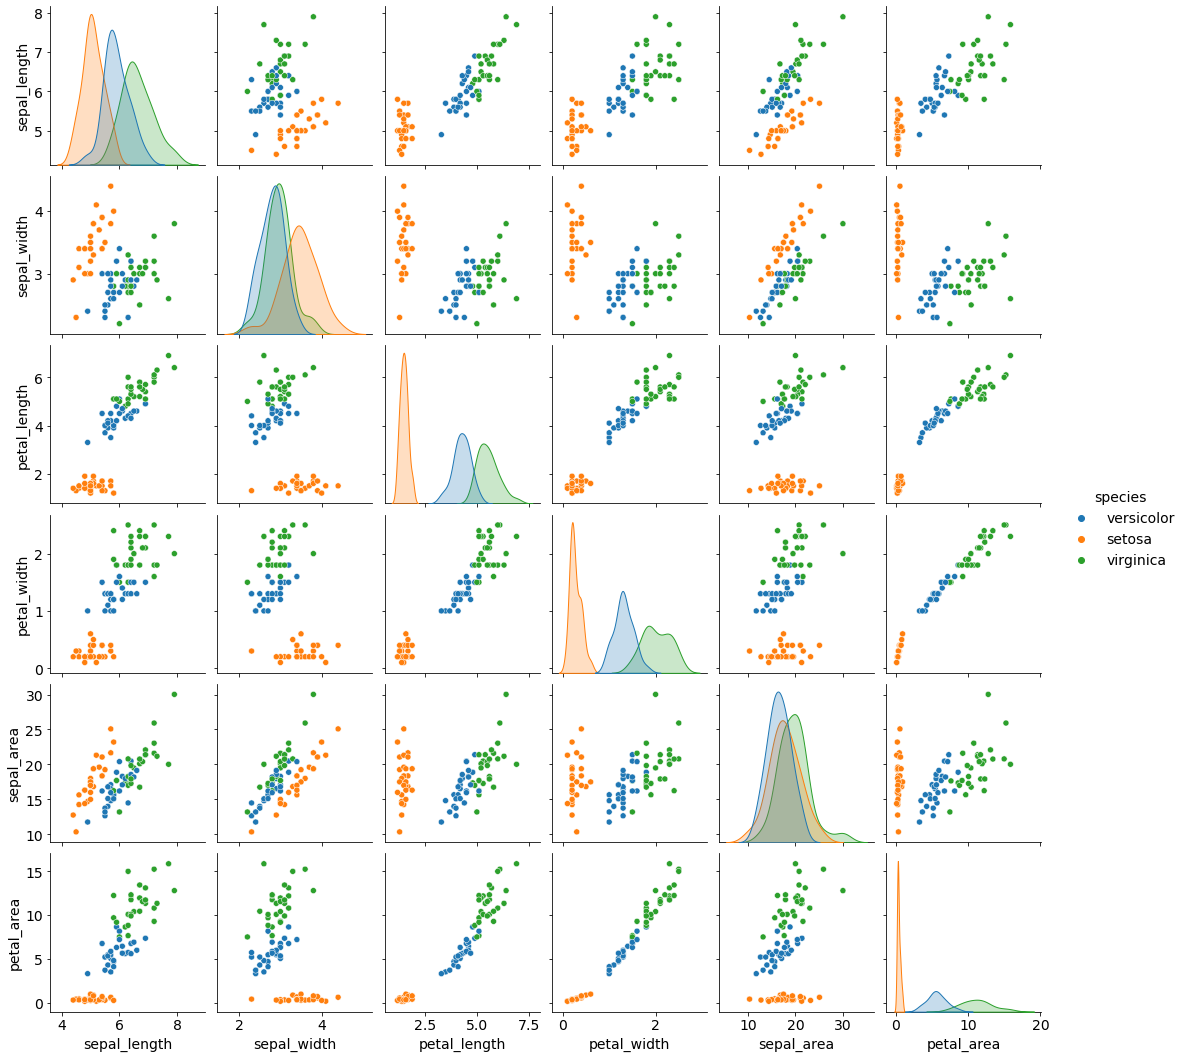

In [17]:
sns.pairplot(train, hue='species')
plt.show()

##### Pairplot Takeaways

- Petal length + petal width show the most seperation between species.
- Setosa has the shortest and narrowest petals. It will be the easiest to determine.
- Petal area seems to show the largest separation between Virginica & Versicolor of all the individual features.
- Virginica shows slightly longer sepals, but whether that difference is significant, it's hard to say.
- Virginica and Versicolor show little to no difference when it comes to the width of the sepals.

___

##### Statistical Testing

- **Hypothesis**

- alpha = .05

- $H_0$: Sepal length is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal length significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [18]:
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

In [19]:
alpha = .05

In [20]:
tstat, p = stats.ttest_ind(virginica.sepal_length,
                versicolor.sepal_length, 
                equal_var=False
               )

In [21]:
print(f'The p-value is less than the alpha: {p < alpha}')

The p-value is less than the alpha: True


**Conclusion** 

- We reject $H_0$ that the sepal length is the same for both groups.

**Takeaway**

- Sepal length will be a useful feature. 

___

**Hypothesis 2**

- alpha = .05

- $H_0$: Sepal width is the same in virginica and versicolor. $\mu_{virginica} == \mu_{versicolor}$.  

- $H_a$: Sepal width significantly different in virginica and versicolor. $\mu_{virginica} != \mu_{versicolor}$. 

In [22]:
ustat, p = stats.mannwhitneyu(virginica.sepal_width, 
                   versicolor.sepal_width
                  )

In [23]:
print(f'The p-value is less than the alpha: {p < alpha}')

The p-value is less than the alpha: True


**Conclusion**

We reject $H_0$ that the sepal width is the same! 

**Takeaway**

Sepal width, while not the strongest indicator, is still useful. 

### Explore Takeaways

- On this first iteration through the pipeline, I will feed all of my original numeric columns into my model to see if I can beat my baseline accuracy.
- It looks like petal area might be a valuable feature to use in a model after my initial attempt to beat the baseline.

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

## Model & Evaluate

<hr style="border-top: 10px groove limegreen; margin-top: 1px; margin-bottom: 1px"></hr>

### Baseline Accuracy

- If I predict Versicolor for every observation, my accuracy would be 33%. I'm going to try to find features that can do a better job predicting than this.

In [38]:
baseline = train.species.value_counts().nlargest(1) / train.shape[0]
print(f'My baseline accuracy is {round(baseline.values[0] * 100,2)}%.')

My baseline accuracy is 33.33%.


### MVP Model

- I'm going to try a Random Forest with 
    - `sepal_width`, 
    - `sepal_length`, 
    - `petal_length`,
    - `petal_width` 
- My goal is to beat my 33% baseline accuracy.

In [25]:
# Define X_train.
X_train = train.drop(columns=['species', 'sepal_area', 'petal_area'])
X_train.head(1)

,sepal_length,sepal_width,petal_length,petal_width
79,5.7,2.6,3.5,1.0


In [35]:
# Define X_val and X_test
X_val = validate.drop(columns='species')
X_test = test.drop(columns='species')
X_val.shape, X_test.shape

((36, 4), (30, 4))

In [27]:
# Define y_train
y_train = train.species
y_train.head()

79     versicolor
36         setosa
133     virginica
95     versicolor
18         setosa
Name: species, dtype: object

In [36]:
# Define y_val and y_test
y_val = validate.species
y_test = test.species
y_val.shape, y_test.shape

((36,), (30,))

In [28]:
# Create the dt_model1.
dt_model1 = DecisionTreeClassifier()

In [30]:
# Fit the model on my X and y train.
dt_model1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
# Score dt_model1 on train dataset.
dt_model1.score(X_train, y_train)

1.0

In [37]:
# Score dt_model1 on validate dataset.
dt_model1.score(X_val, y_val)

0.9722222222222222

### dt_model1 Takeaways

- My model is predicting species at 100% on my train dataset. This is a red flag in most cases that my Decision Tree model is overfit, However, Iris is a very small and simple dataset, so the dropoff in accuracy is not too bad; it is still predicting species with 97% accuracy.
- This model already predicts my target variable, species, much better than my baseline accuracy of 33%.
- Going forward, I can adjust hyperparameters to improve this model, and I can use other classifier algorithms to create different models to try to improve on this first dt_model1.

### Logistic Regression Model

### Logistic Regression Takeaways

### Test My Best Model

- Remember, I will only evaluate my single best model, that might mean the least dropoff in accuracy from train to validate rather than the highest accuracy.

## Conclusions and Next Steps

- Here is where I would report my overall conclusions from the entire project.
- I would also want to mention any next steps I'd like to take in future iterations of this project; steps I might have done if I'd had more time on this project.